# Goal:
Load the data that Erik provided into this python notebook for analysis. Specifically, look at the count of distinct attempts (and optionally experience level) for one skill question (1-1) and one problem-solving question (2-3). Look at the 2016 and 2017 data separately (graph, calculate averages, etc.) and then aggregate them to look for patterns on a more macro scale.

Question 1-1 is a skill-based question in which the user is writes a short code that counts and prints the number of vowels in a string.

Question 2-3 is a problem-solving question that requires the user to write a code that finds the smallest monthly payment that an individual can pay per month that would allow them to pay off their debt in a year given a specificed interest rate. This question focuses on using a bisection technique to speed up code written in the previous question in this problem set. 

*Now Extend to all questions*

# Some Potential Research Questions

-Is there one coder-experience group that significantly outperforms all other groups in the course in regard to skill-based questions? Problem-solving questions? Both?

-How do number of attempts vary as the course progesses? Down because people are giving up? Down because they are more experienced? Up because the problems are harder? Down for certain groups, up for others?

-Can we identify a turning point? (point where we can observe a potentially significant shift in attempts and/or accuracy)

In [1]:
#need to add 'data/clickstream/csv' before all .cvs filenames

In [42]:
# Load the Pandas library with alias 'pd'
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Name data file
from Data import *

In [3]:
# Specify columns and path
cols = [0, 2, 4, 5]

path_to_files = 'data/clickstream/csv/'

In [4]:
#2016 Data for each question grouped by user experience 
df = []

for count in range(len(data_2016)):
    df = pd.read_csv(path_to_files + data_2016[count], index_col=0, usecols=cols)
   # print(df.head(), "\n")
    print(data_2016[count], '\n')
    print(df.groupby(['user_exp']).mean(), '\n')

2016_unit1_pb1_history.csv 

                 final_correct_bool  num_distinct
user_exp                                         
absolutely_none            0.997722      2.273349
know_python                1.000000      1.993528
no_response                0.990000      2.775000
other_language             0.998920      1.934125
veteran                    1.000000      1.888889 

2016_unit1_pb2_history.csv 

                 final_correct_bool  num_distinct
user_exp                                         
absolutely_none            0.995392      2.428571
know_python                0.996743      2.149837
no_response                0.979798      2.919192
other_language             0.993428      1.978094
veteran                    1.000000      2.222222 

2016_unit1_pb3_history.csv 

                 final_correct_bool  num_distinct
user_exp                                         
absolutely_none            0.923445      3.586124
know_python                0.970297      3.501650
no_respon

In [5]:
#2017 Data for each question grouped by user experience 

for count in range(len(data_2017)):
    df = pd.read_csv(path_to_files + data_2017[count], index_col=0, usecols=cols)
    print(data_2017[count], '\n')
    #print(df)
    print(type(df))
    print(df.groupby(['user_exp']).mean(), '\n')

2017_unit1_pb1_history.csv 

<class 'pandas.core.frame.DataFrame'>
                 final_correct_bool  num_distinct
user_exp                                         
absolutely_none            0.985380      2.549708
know_python                0.995475      1.923077
no_response                1.000000      1.693252
other_language             0.998028      1.828402
veteran                    1.000000      1.625000 

2017_unit1_pb2_history.csv 

<class 'pandas.core.frame.DataFrame'>
                 final_correct_bool  num_distinct
user_exp                                         
absolutely_none            0.989189      2.416216
know_python                0.991803      2.028689
no_response                0.989189      2.135135
other_language             0.998270      2.039792
veteran                    1.000000      2.074074 

2017_unit1_pb3_history.csv 

<class 'pandas.core.frame.DataFrame'>
                 final_correct_bool  num_distinct
user_exp                                     

2017_unit5_pb4_history.csv 

<class 'pandas.core.frame.DataFrame'>
                 final_correct_bool  num_distinct
user_exp                                         
absolutely_none            0.954098      2.445902
know_python                0.985981      2.032710
no_response                0.986207      1.806897
other_language             0.978541      2.248927
veteran                    1.000000      1.800000 



In [6]:
#2016 AND 2017 Data for each question grouped by user experience (concatenated data)

store_data = pd.DataFrame()
question_df = pd.DataFrame()

for count in range(len(data_agg)):
    df_1 = pd.read_csv(path_to_files + data_years[0] + data_agg[count], index_col=0, usecols=cols)     
    df_2 = pd.read_csv(path_to_files + data_years[1] + data_agg[count], index_col=0, usecols=cols)
    DF = df_1.append(df_2)
    #print(DataFrame)
    print(data_agg[count])
    print(DF.groupby(['user_exp']).mean(), '\n')
#     question_number = []
#     store_data = DF.set_index(data_agg[count])
    DF.insert(2, "question", data_agg[count], True) 
    
    store_data = pd.concat([store_data, DF], axis = 0, sort = False)
store_data = store_data.reset_index()

_unit1_pb1_history.csv
                 final_correct_bool  num_distinct
user_exp                                         
absolutely_none            0.992318      2.394366
know_python                0.998113      1.964151
no_response                0.994490      2.289256
other_language             0.998604      1.896720
veteran                    1.000000      1.797101 

_unit1_pb2_history.csv
                 final_correct_bool  num_distinct
user_exp                                         
absolutely_none            0.992537      2.422886
know_python                0.994555      2.096189
no_response                0.984334      2.540470
other_language             0.995305      2.002012
veteran                    1.000000      2.166667 

_unit1_pb3_history.csv
                 final_correct_bool  num_distinct
user_exp                                         
absolutely_none            0.904884      3.494859
know_python                0.970093      3.428037
no_response                

# 2016 and 2017 COMBINED User Exp / Accuracy / Attempts

In [7]:
one_2016= path_to_files + '2016_unit2_pb3_history.csv'
one_2017= path_to_files + '2017_unit2_pb3_history.csv'

summ = ((pd.read_csv(one_2016, index_col=0, usecols=cols), (pd.read_csv(one_2017, index_col=0, usecols=cols))))
#print(summ)
print (1919+1257) #11
print (1858+1369) #23
print (1330+1771) #47
#so that i know file combination function is working

3176
3227
3101


# Plot Stuff

In [33]:
store_data_grouped_distinct = store_data.groupby(['user_exp', 'question'])['num_distinct'].mean()
store_data_grouped_distinct = store_data_grouped_distinct.reset_index()

store_data_grouped_correct = store_data.groupby(['user_exp', 'question'])['final_correct_bool'].mean()
store_data_grouped_correct = store_data_grouped_correct.reset_index()

store_data_grouped_correct.head(5)

,user_exp,question,final_correct_bool
0,absolutely_none,_unit1_pb1_history.csv,0.992318
1,absolutely_none,_unit1_pb2_history.csv,0.992537
2,absolutely_none,_unit1_pb3_history.csv,0.904884
3,absolutely_none,_unit2_pb1_history.csv,0.968059
4,absolutely_none,_unit2_pb2_history.csv,0.962640


No handles with labels found to put in legend.


<Figure size 720x360 with 0 Axes>

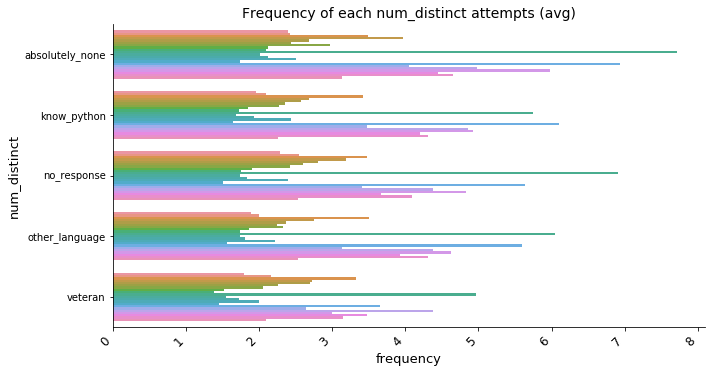

In [34]:
#need to create dataframe with user_exp, correct bool, distinct, and question
#make a horizontal bar plot with side by side data
plt.figure(figsize=(10,5))

sns.catplot(x = 'num_distinct', y = 'user_exp', hue = 'question', 
            data = store_data_grouped_distinct, kind="bar", legend = False, aspect = 2)
plt.title("Frequency of each num_distinct attempts (avg)", fontsize = 14)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('frequency', fontsize=13)
plt.ylabel('num_distinct', fontsize=13)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontsize='large'  
)

plt.show()

No handles with labels found to put in legend.


<Figure size 720x360 with 0 Axes>

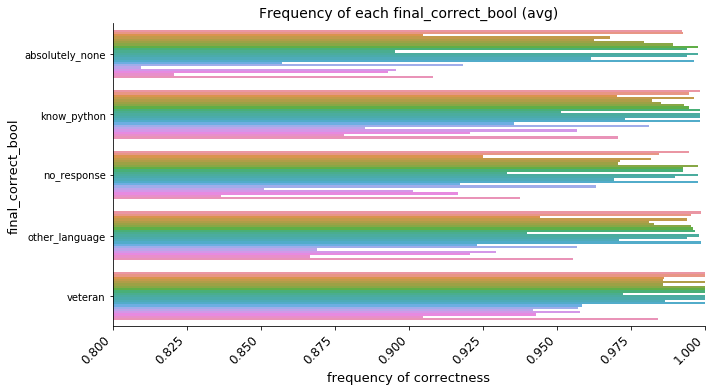

In [52]:
plt.figure(figsize=(10,5))

sns.catplot(x = 'final_correct_bool', y = 'user_exp', hue = 'question', 
            data = store_data_grouped_correct, kind="bar", legend = False, aspect = 2)
plt.title("Frequency of each final_correct_bool (avg)", fontsize = 14)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('frequency of correctness', fontsize=13)
plt.ylabel('final_correct_bool', fontsize=13)
plt.xlim(0.8,1)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontsize='large'  
)

plt.show()